In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

Using load_img

example code of how to show individual images

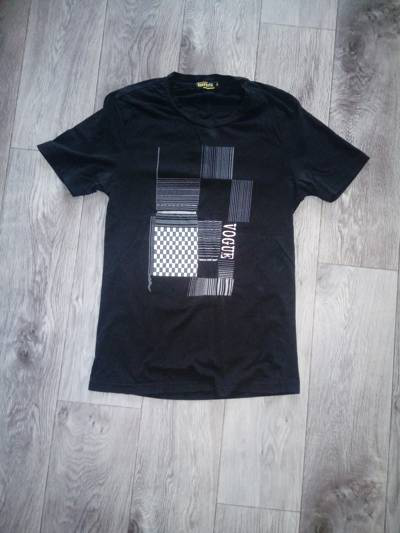

In [16]:
path = './data/train/t-shirt'
name = '1bc82def-5c39-4593-b7cd-171d65ecd44f.jpg'
full_name = path + '/' + name
load_img(full_name)

How to resize the image

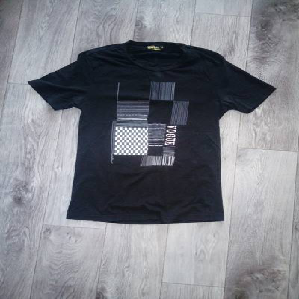

In [17]:
load_img(full_name, target_size=(299,299))

Going to use the model Xception

In [18]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

Load the model

In [19]:
model = Xception(
    weights = 'imagenet',
    input_shape = (299,299,3)
)

To adapt this model to a new domain we will keep the convolutional layer and retrain the dense layers.

Use ImageDataGenerator to load the images from the disk in small batches.

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [21]:
train_ds = train_gen.flow_from_directory(
    # load all the images from the train directory
    "data/train",
    # resize the image to 150x150
    target_size=(150,150),
    # load the images in batches of 32
    batch_size=32
)

Found 3068 images belonging to 10 classes.


Repeat the same process for the validation dataset.

In [22]:
validation_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [23]:
val_ds = validation_gen.flow_from_directory(
    # load all the images from the train directory
    "data/validation",
    # resize the image to 150x150
    target_size=(150,150),
    # load the images in batches of 32
    batch_size=32,
)

Found 341 images belonging to 10 classes.


Create the model.

In [24]:
base_model = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

base_model.trainable = False

Building the classification model

In [25]:
# input images are 150x150 with three channels
inputs = keras.Input(shape=(150,150,3))

# use the base model to extract the high-level features
base = base_model(inputs,training=False)
# extract the vector representation - converts the output of base_model to a vector
vector = keras.layers.GlobalAveragePooling2D()(base)

# adds a dense layer of size 10 - one element for each class
outputs = keras.layers.Dense(10)(vector)

# combines the inputs and the outputs into a Keras model
model = keras.Model(inputs,outputs)

In [26]:
inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False)

First parameter - inputs
this is what will be input to the base model

Second parameter - training
this is to let it know we don't want to train the base model

We will use this as input to the next layer.

In [27]:
vector = keras.layers.GlobalAveragePooling2D()(base)

Create a pooling layer

A pooling layer allows the conversion of the output of a convolution layer into a vector

We create the pooling layer and connect it to base

We get a vector, which will be connected to the next layer, which is a dense layer

In [28]:
outputs = keras.layers.Dense(10)(vector)

Finally, wrap both inputs and outputs into a Model class.

In [29]:
model = keras.Model(inputs, outputs)

**Summary: Keras Documentation - Models**

**Introduction to Deep Learning:**

1. **Imports:**
   ```python
   import tensorflow as tf
   import numpy as np
   from tensorflow import keras
   print(tf.__version__)
   ```

2. **Define and Compile the Neural Network:**
   ```python
   model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
   model.compile(optimizer='sgd', loss='mean_squared_error')
   ```

3. **Providing the Data:**
   ```python
   xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
   ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)
   ```

4. **Training the Neural Network:**
   ```python
   model.fit(xs, ys, epochs=500)
   ```

5. **Making Predictions:**
   ```python
   print(model.predict([10.0]))
   ```

**Computer Vision:**

1. **Importing TensorFlow:**
   ```python
   import tensorflow as tf
   print(tf.__version__)
   ```

2. **Loading and Exploring the Dataset:**
   ```python
   (training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
   ```

3. **Data Preprocessing:**
   ```python
   training_images = training_images / 255.0
   test_images = test_images / 255.0
   ```

4. **Building the Neural Network Model:**
   ```python
   model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                       tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                       tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
   ```

5. **Compiling and Training the Model:**
   ```python
   model.compile(optimizer=tf.optimizers.Adam(),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
   model.fit(training_images, training_labels, epochs=5)
   ```

6. **Model Evaluation:**
   ```python
   model.evaluate(test_images, test_labels)
   ```

**Callbacks API Implementation:**

1. **Load and Normalize the Fashion MNIST Dataset:**
   ```python
   import tensorflow as tf
   fmnist = tf.keras.datasets.fashion_mnist
   (x_train, y_train), (x_test, y_test) = fmnist.load_data()
   x_train, x_test = x_train / 255.0, x_test / 255.0
   ```

2. **Creating a Callback Class:**
   ```python
   class myCallback(tf.keras.callbacks.Callback):
       def on_epoch_end(self, epoch, logs={}):
           if(logs.get('loss') < 0.4):
               print("\nLoss is lower than 0.4 so cancelling training!")
               self.model.stop_training = True
   callbacks = myCallback()
   ```

3. **Define and Compile the Model:**
   ```python
   model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(28, 28)),
     tf.keras.layers.Dense(512, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
   ])
   model.compile(optimizer=tf.optimizers.Adam(),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
   ```

4. **Train the Model with Callback:**
   ```python
   model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
   ```

5. **Optional Challenge:**
   ```python
   if(logs.get('accuracy') > 0.6):
       print("\nAccuracy exceeds 60%, stopping training!")
       self.model.stop_training = True
   ```

**Improving Computer Vision Accuracy:**

**Shallow Neural Network:**
   ```python
   model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
   ])
   model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
   model.fit(training_images, training_labels, epochs=5)
   test_loss = model.evaluate(test_images, test_labels)
   ```

**Convolutional Neural Network:**
   ```python
   model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
     tf.keras.layers.MaxPooling2D(2, 2),
     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
   ])
   model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
   model.fit(training_images, training_labels, epochs=5)
   test_loss = model.evaluate(test_images, test_labels)
   ```

**Exploration of Convolutions:**

**Image Loading and Visualization:**
   ```python
   from scipy.datasets import ascent
   ascent_image = ascent()
   import matplotlib.pyplot as plt
   plt.grid(False)
   plt.gray()
   plt.axis('off')
   plt.imshow(ascent_image)
   plt.show()
   ```

**Convolution and Max Pooling:**
   ```python
   filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
   weight = 1
   # Convolution code...
   # Visualization code...
   # Max pooling code...
   ```